# HW3
# CSC 635


In [1]:
"""
hw3
Author: Rafail Islam
CSC 635
"""

'\nhw3\nAuthor: Rafail Islam\nCSC 635\n'

In [1]:
#-----------------------------------import--------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from random import sample

In [2]:
#----------------------------------global variables------------------------
# Load data
train_data = pd.read_csv("MNIST_train.csv")
test_data = pd.read_csv('MNIST_test.csv')

In [3]:
# convert to numpy
train = train_data.to_numpy()
test  = test_data.to_numpy()
#print(train.dtype)
print(test.shape)

(50, 785)


In [4]:
# my test data 
td = [[0,5,4],[0,5,2],[0,8,4],[0,8,5],[0,8,7],[0,9,5],
      [1,3,8],[1,3,10],[1,4,12],[1,6,9],[1,6,11],[1,9,10]]
td1 = np.array(td)
td1

array([[ 0,  5,  4],
       [ 0,  5,  2],
       [ 0,  8,  4],
       [ 0,  8,  5],
       [ 0,  8,  7],
       [ 0,  9,  5],
       [ 1,  3,  8],
       [ 1,  3, 10],
       [ 1,  4, 12],
       [ 1,  6,  9],
       [ 1,  6, 11],
       [ 1,  9, 10]])

In [5]:
#-------------------------------Functions--------------------------------------

# Evaluating distance between two tuples
def get_distance(D,t, p = 2):
    """ This function determine distace between two vectors
    
    Parameters:
    --------------
    D : 1D array/list
        input vector in train dataset
    t : 1D array/list
        input vector in test dataset
    p : int (default=2, 2 for euclidean, 1 for manhattan )
        type of distance 
    
    Returns:
    --------------
    distance : float32
        distance between two input vectors
    
    """
    # initialize distance
    distance = 0.
    
    for x in range(len(D)-1):
        distance += (abs(D[x+1]-t[x]))**p
    distance = distance **(1/p)
    
    return distance

In [6]:
# Build KNN 
def knn(D,t,k):
    """ this function preditcs the class of a test sample by K-nearest Neighbours algorithm
    
    Parametes:
    -------------
    D : 2D numpy arrays
        training data set
    t : 1D array/list
        single test sample
    k : int
        number of nearest neighbours
    
    Returns
    -------------
    label_by_voting : class type
        predicted class label by uniform voting
    label_by_weight_voting: class type
        predicted class label by weighted voting
    
    """
    # empty list for tuples
    N = []
    # list for storing best distances
    dist = []
    
    # for each data in data set
    for d in D:
        
        # get distance
        distance = get_distance(d,t)
        
        # append the label of the data in neighbour list
        if len(N) < k:
            N.append(d[0]) 
            dist.append(distance)
        elif distance < np.max(dist):
            
            dist.remove(np.max(dist))
            N.pop(np.argmax(dist))
            dist.append(distance)
            N.append(d[0])
    
    # I did both uniform count voting and weight voting to see the progress
    
    #--------count vote--------- 
    #print(N)
    #print(dist)
    label_by_voting =  max(set(N),key=N.count)
    
    #--------count weighted vote------
    label_dic = {}
    
    # get all unique class from the taining data set and make a dictionary
    # where key is the class and value is weighted vote. Values are set to 0.0 initially.
    for x in D[:,0]:
        label_dic[x]=0.0
    #print(label_dic)
    
    # calculate distance weighted voting
    for i in range(k):
        label_dic[N[i]] += 1/dist[i]**2
        
    #print(label_dic)
    
    # get key with maximum weighted voting
    label_by_weight_voting = max(label_dic,key=label_dic.get)
    
    return label_by_voting,  label_by_weight_voting

t = np.array([2,7])
print(knn(td1,t,4))

(1, 1)


In [7]:
# Accuracy function for derterming accuracy

def classify(train,test,k):
    """ This function calculate accuracy of all test data over given train data set.
    
    Parameters
    ------------
    train : 2D numpy arrays
        training data set
    test : 2D array/list
        test data set
    k : int
        number of nearest neighbours
    Returns
    ------------
    accuracy_voting : float
        accuracy by uniform voting
    accuracy_weight_voting : float
        accuracy by distace weight voting
    """
    prd_voting = []
    prd_weight_voting = []
    
    for t in test:
        clss1, clss2= knn(train,t,k)
        prd_voting.append(clss1)
        prd_weight_voting.append(clss2)
    
    #print(" vot : %.1f%%" %(accuracy_score(test[:,0],np.asarray(prd_voting) )*100) )
    #print(" w_vot : %.1f%%" %(accuracy_score(test[:,0],prd_weight_voting)*100) )
    
    # evaluate voting accuracy using accuracy_score metrics
    accuracy_voting = accuracy_score(test[:,0],np.asarray(prd_voting) )
    accuracy_weight_voting  =accuracy_score(test[:,0],prd_weight_voting)
                                     
    
    return accuracy_voting , accuracy_weight_voting

#classify(train,test,k=5)
    

In [8]:
# Find best value of k
def bestK(train,test,kmin=2,kmax=10):
    """ This function determine best value of k from the given range. 
    
    Parameters
    ------------
    train : 2D array
        tarin data set
    test : 2D array
        test data set
    kmin : int (default: 2)
        minimum value of k
    kmax : int (default: 10)
        maximum value of k
    
    Returns
    ------------
    best_k : int
        best value of k
    
    """
    # dictionary for storing value of K as key and Accuracy of correspoing value of K as value
    k_hist = {}
    
    for k in range(kmin,kmax+1):
        #train_samples = sample(train, len(train)*0.4)
        
        # take random sample from train data set
        # size of random sample = 30% of training data set
        train_samples = train[np.random.choice(train.shape[0], int(len(train)*0.3), replace=False), :]
        
        _,acc = classify(train_samples,test,k)
        k_hist[k] = acc
    
    # best value of k with maximum weight voting
    best_k = max(k_hist,key=k_hist.get)
    
    # Plot k VS accuracy
    lists = sorted(k_hist.items())
    x,y = zip(*lists)
    #print(x,y)
    plt.plot(x,y)
    plt.xlabel("Value of K")
    plt.ylabel("Accuracy with random sample")
    plt.title("K vs. Accuracy")
    plt.show()
    
    return best_k
#bestK(train,test)
        

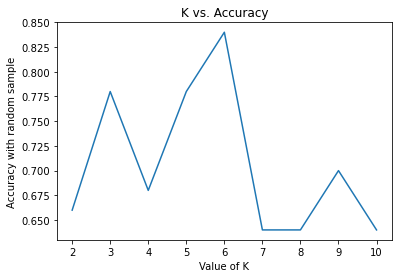

K = 6
Desired class:  0  computed class:  0
Desired class:  0  computed class:  0
Desired class:  0  computed class:  0
Desired class:  0  computed class:  0
Desired class:  0  computed class:  0
Desired class:  1  computed class:  1
Desired class:  1  computed class:  1
Desired class:  1  computed class:  1
Desired class:  1  computed class:  1
Desired class:  1  computed class:  1
Desired class:  2  computed class:  8
Desired class:  2  computed class:  2
Desired class:  2  computed class:  7
Desired class:  2  computed class:  6
Desired class:  2  computed class:  2
Desired class:  3  computed class:  3
Desired class:  3  computed class:  3
Desired class:  3  computed class:  3
Desired class:  3  computed class:  3
Desired class:  3  computed class:  3
Desired class:  4  computed class:  2
Desired class:  4  computed class:  6
Desired class:  4  computed class:  4
Desired class:  4  computed class:  4
Desired class:  4  computed class:  4
Desired class:  5  computed class:  5
Desire

In [9]:
# Main function to call all the necessary functions
def main():
    
      
    # finding best value of k
    # Note: uncomment the line below to find best value of k. But I am not sure. If this is optimal. Dr. Saquer
    # said that you may use random sample to find best value of k. However, It does not give same value of K 
    # all the time as it is randomized.
    
    k = bestK(train,test)
    
    # I found k=5 works better in this case. We can use K=5 to get maximum accuracy.
    #k = 5
    print("K =",k)
    
    missClassified = 0
    
    for t in test:
        clss1, clss2 = knn(train,t,k)
        
        print("Desired class: ",t[0]," computed class: ",clss2)
        
        if t[0] != clss2 :
            missClassified += 1
            #print("Desired class: ",t[0]," computed class: ",clss2)
            
    accuracy = ( 1 -  missClassified/len(test) ) * 100
    
    print("Accuracy rate: %.1f%%" %accuracy)
    print("Number of misclassified test samples: ", missClassified)
    print("Total number of test samples: ",len(test))
main()

#---------------------------------------End of Functions----------------------------------------------